<a href="https://colab.research.google.com/github/vamshinaidu/DL-ASSIGN-117/blob/main/GRU%2CLSTM%2CRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence

In [2]:
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 55s 236ms/step - loss: 0.4855 - accuracy: 0.7514
Epoch 2/5
196/196 [==============================] - 30s 153ms/step - loss: 0.2889 - accuracy: 0.8816
Epoch 3/5
196/196 [==============================] - 16s 80ms/step - loss: 0.2511 - accuracy: 0.9002
Epoch 4/5
196/196 [==============================] - 15s 76ms/step - loss: 0.2260 - accuracy: 0.9117
Epoch 5/5
196/196 [==============================] - 11s 59ms/step - loss: 0.1719 - accuracy: 0.9362


In [4]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 13ms/step - loss: 0.3364 - accuracy: 0.8807
accuracy: 0.8807200193405151
loss: 0.3364078998565674


In [5]:
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 11s 54ms/step - loss: 0.1316 - accuracy: 0.9520
Epoch 2/5
196/196 [==============================] - 8s 39ms/step - loss: 0.1052 - accuracy: 0.9628
Epoch 3/5
196/196 [==============================] - 7s 37ms/step - loss: 0.0859 - accuracy: 0.9712
Epoch 4/5
196/196 [==============================] - 7s 35ms/step - loss: 0.0641 - accuracy: 0.9792
Epoch 5/5
196/196 [==============================] - 10s 53ms/step - loss: 0.0558 - accuracy: 0.9817


In [6]:
train_loss1 = history.history['loss']
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))

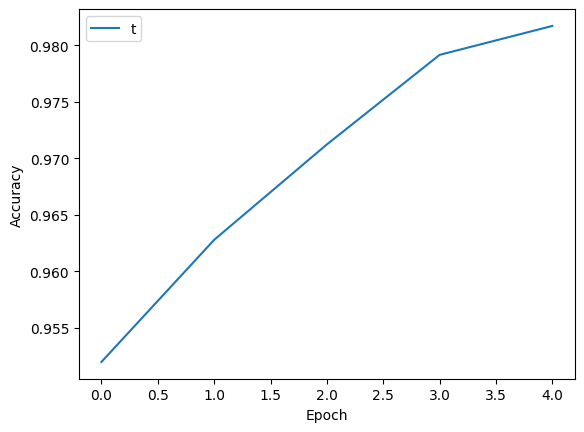

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')


### **LSTM**

In [8]:
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [9]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 5
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)

Epoch 1/5
196/196 [==============================] - 38s 172ms/step - loss: 0.4874 - accuracy: 0.7716
Epoch 2/5
196/196 [==============================] - 22s 111ms/step - loss: 0.3822 - accuracy: 0.8379
Epoch 3/5
196/196 [==============================] - 15s 77ms/step - loss: 0.3111 - accuracy: 0.8774
Epoch 4/5
196/196 [==============================] - 13s 69ms/step - loss: 0.2445 - accuracy: 0.9061
Epoch 5/5
196/196 [==============================] - 11s 58ms/step - loss: 0.2070 - accuracy: 0.9235


In [12]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3814 - accuracy: 0.8666
accuracy: 0.8666399717330933
loss: 0.38139086961746216


In [13]:
train_loss2 = hist.history['loss']
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))

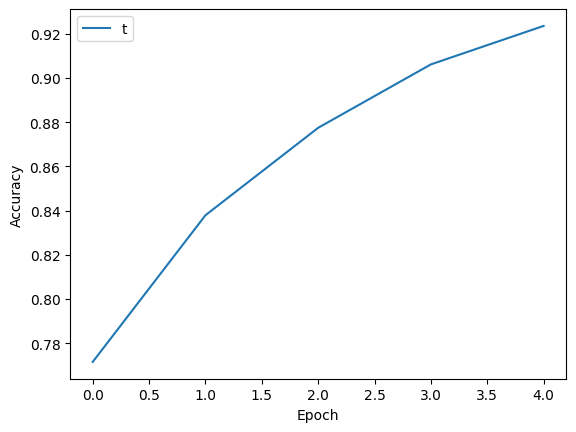

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

### **RNN**

In [15]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers

In [16]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 5
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 30s 177ms/step - loss: 0.5049 - accuracy: 0.7408 - val_loss: 0.4231 - val_accuracy: 0.8046
Epoch 2/5
157/157 [==============================] - 18s 112ms/step - loss: 0.2820 - accuracy: 0.8862 - val_loss: 0.3672 - val_accuracy: 0.8444
Epoch 3/5
157/157 [==============================] - 14s 89ms/step - loss: 0.2224 - accuracy: 0.9147 - val_loss: 0.3180 - val_accuracy: 0.8676
Epoch 4/5
157/157 [==============================] - 10s 63ms/step - loss: 0.1771 - accuracy: 0.9353 - val_loss: 0.3486 - val_accuracy: 0.8618
Epoch 5/5
157/157 [==============================] - 10s 63ms/step - loss: 0.1355 - accuracy: 0.9531 - val_loss: 0.4032 - val_accuracy: 0.8666


#mse for regression prblm output only 1
#binary cross entropy for binary output only 2
#categorical cross entropy for multiple ourput more than 2
#activation - sigmoid relu tanh
#optimizer - stocasticgd gd adam

In [19]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.4050 - accuracy: 0.8656
accuracy: 0.8656399846076965
loss: 0.4050139784812927


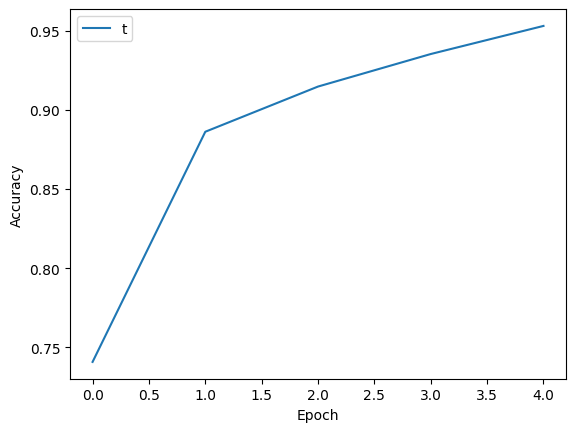

In [20]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

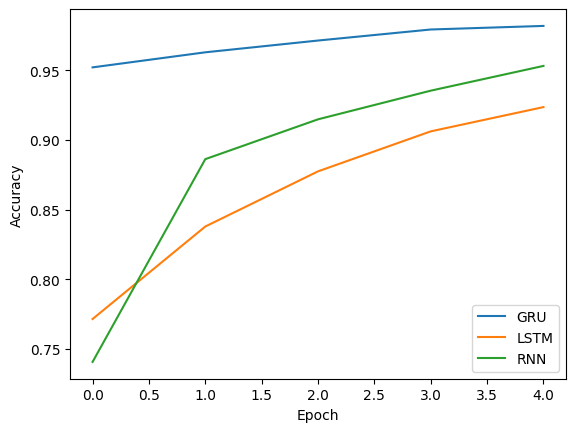

In [21]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])